In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [2]:
# Loading built-in Datasets:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
iris.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [21]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

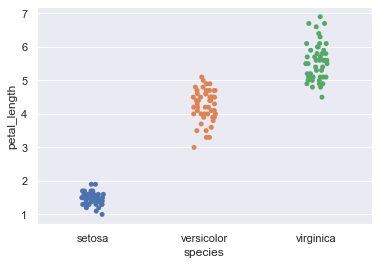

In [4]:
sns.set()
%matplotlib inline
sns.stripplot(x='species', y='petal_length', data=iris);

In [5]:
X = iris.iloc[:, :4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = iris.iloc[:, -1] #pd.get_dummies
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [10]:
print(clf.score(X_test, y_test))

1.0


# Prediction

In [11]:
print(clf.predict([[ 6.3 , 2.5, 5., 1.9]]))

['virginica']


# Save model

In [12]:
import joblib

In [13]:
joblib.dump(clf, 'svc.joblib')

['svc.joblib']

# Load model

In [14]:
clf = joblib.load('svc.joblib') 

In [15]:
print(clf.predict([[ 6.3 , 2.5, 5., 1.9]]))

['virginica']


# API function

In [16]:
from typing import List
from sklearn.base import BaseEstimator

In [17]:
def prediction(model: BaseEstimator, data_array:List):
    '''
    model: Trainedn SVC Model 
    data_array: input data for model
    '''

    return model.predict([data_array])[-1]

In [18]:
prediction(clf, [ 6.3 , 2.5, 5., 1.9])

'virginica'